<a href="https://colab.research.google.com/github/NikolasGialitsis/ProteinsDistanceGeometry/blob/master/ProteinsDistanceGeometry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Distance Checking - 2nd Assignment 



> MSc Bioinformatics and Biomedical Data Science

> Algorithms in Structural Bioinformatics

>> @AUTHOR Nikos Gialitsis DS2.0005



a) Feruloyl esterases are enzymes of industrial interest that catalyse the hydrolysis of the ester
bond between hydroxycinnamic acids such as ferulic acid and sugars present in the plant cell
wall. There is strong interest by the industrial sector to exploit them as biocatalysts. The PDB
codes for two of these enzymes are 6FAT and 1UWC. These correspond to the same enzyme
that is expressed by two different organisms, Fusarium oxysporum and Aspergillus niger, respectively.

1. Visualize both protein structures using Chimera (https://www.cgl.ucsf.edu/chimera/)
showing the secondary structure elements.

2. Prepare two figures:
- one figure presenting the 2 superimposed overall 3D structures using the relevant
tool as implemented in Chimera (following link). Give the c-RMSD between the 2
structures as calculated by Chimera after superposition. This figure will highlight the
changes in the overall structures
(https://www.cgl.ucsf.edu/chimera/docs/UsersGuide/superposition.html)
- one figure presenting the two structures superimposed giving emphasis on the calcium binding site which is present only in 6FAT. This figure will reveal changes imposed by the presence of calcium.

## Secondary Structures

In [0]:
from PIL import Image 
im = Image.open("Overlayed_Structures.png")  
im

## Overlayed Structures

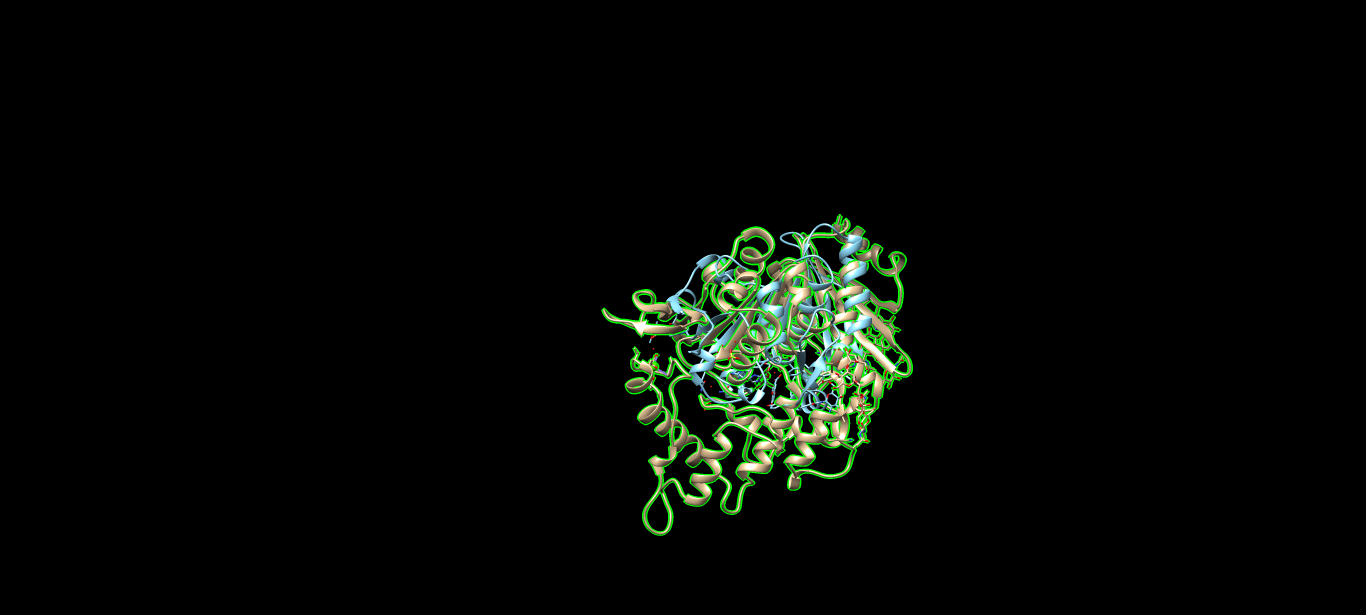

In [357]:
im = Image.open("Overlayed_Structures.png")  
im

## c-RMSD as Calculated by Chimera

Matchmaker 1UWC, chain A (#1) with 6FAT, chain A (#0), sequence alignment score = 113.6
with these parameters:


	chain pairing: bb
	Needleman-Wunsch using BLOSUM-62
	ss fraction: 0.3
	gap open (HH/SS/other) 18/18/6, extend 1
	ss matrix:  (O, S): -6 (H, O): -6 (H, H): 6 (S, S): 6 (H, S): -9 (O, O): 4
	iteration cutoff: 2


RMSD between 20 pruned atom pairs is 1.037 angstroms; (across all 234 pairs: 22.983)


## Calcium Binding Site

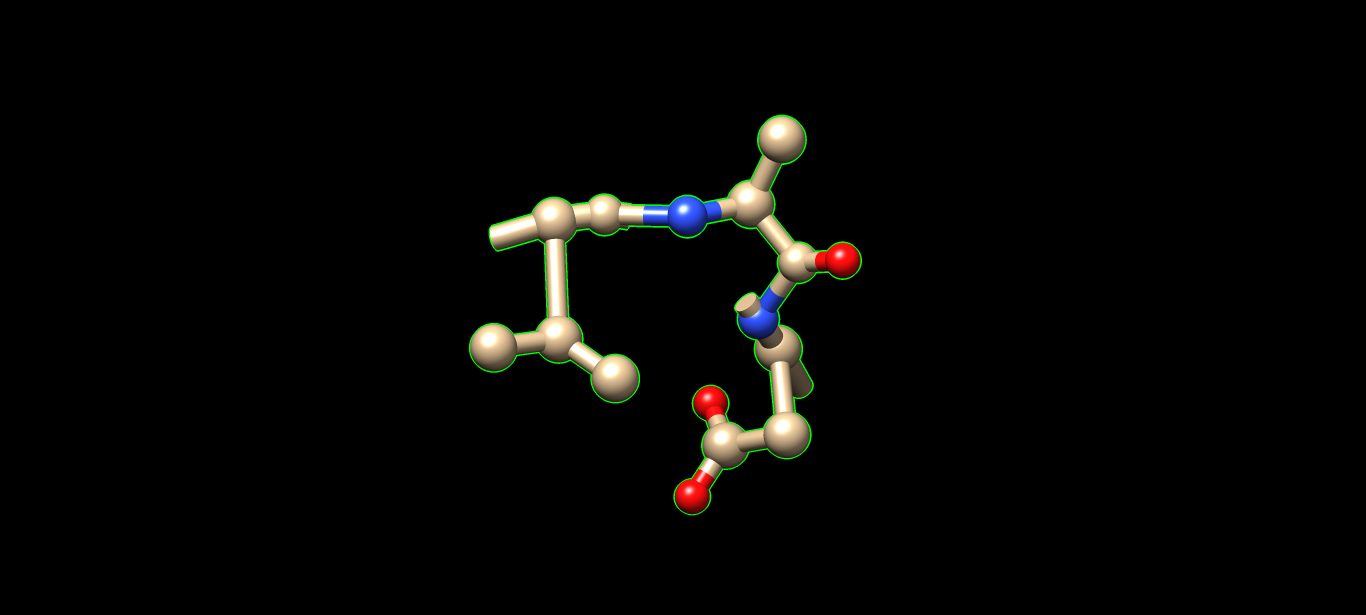

In [355]:
im = Image.open("/content/CalciumBindingSite.png")  
im

b) Calculate the c-RMSD for the comparison of the structures in (a) using your software from
Assignment 1, or any available tool, if you didn’t finish your own: Make sure you download
the coordinates in .pdb format and NOT .cif format because this might not be readable by
selected software. So you shall calculate c-RMSD over:
i. all atoms,
ii. over Ca atoms,
iii. over main chain atoms


Load libraries from previous exercise

In [0]:
import numpy as np



def euclidean_norm_power2(a,b):
  dim = len(a)
  assert(dim > 0)
  assert(dim == len(b))
  sum_sqrts = 0
  for d in range(dim):
    sum_sqrts += ((a[d] - b[d])*(a[d] - b[d]))
  assert(sum_sqrts >= 0)
  return sum_sqrts

def cRMSD(listX,listY):
  assert(len(listX) == len(listY))
  n = len(listX)
  assert(n > 0)
  sum_atoms = 0
  for ident in range(n):
    x = listX[ident]
    y = listY[ident]
    sum_atoms += euclidean_norm_power2(x,y)
  
  return np.sqrt(sum_atoms/n)

def getCentroid(atomsList):
  sum_atoms = []
  n = len(atomsList)
  dims = len(atomsList[0])
  for dim in range(dims):
    sum_atoms.append(np.array([atom[dim] for atom in atomsList]).sum()/n)
  return sum_atoms

def translateOrigin(atomsList):
  centroid = getCentroid(atomsList)
  for x in atomsList:
    for d in range(len(x)):
      x[d] -= centroid[d]

def GetImproved_cRMSD(X,Y):
  translateOrigin(X)
  translateOrigin(Y)
  XY = np.matmul(X.transpose(),Y)
  SVD = np.linalg.svd(XY)

  U = SVD[0]
  Sigma = SVD[1]
  V = SVD[2]


  Q = np.matmul(U,V)

  detQ = np.linalg.det(Q)
  if detQ < 0:
    U[2] = -U[2]
    Q = np.matmul(U,V)
    detQ = np.linalg.det(Q)
    assert(detQ >= 0)

  XQ = np.matmul(X,Q)
  final = cRMSD(XQ,Y)
  assert(final != float("inf"))
  assert(final != float("-inf"))
  assert(final >= 0)
  return final



## PDB coords extraction

In [0]:

def getPDBCoords(molecules,mode='All'):
  mol_array = []
  for mol in molecules:
    print('Get coords for molecule ',mol)
    array = []
    with open(mol) as pdbfile:
        for line in pdbfile:
            if line[:5] == 'MODEL':
              print('Parsing  Molecule '+str(model_num))
              model_num = model_num + 1
              mol1 = []
            elif line[:4] == 'ATOM':
              if mode == 'CA':          
                residue = line[12:16]
                residue = residue[1:3]
                if residue != 'CA':
                  continue
              elif mode == 'MAIN':
                chain = line[21:22]
                if chain != 'A':
                  continue
              # Split the line
              x_list = line[30:38]
              y_list = line[38:46]
              z_list = line[46:54]

              x_str = ' '.join([str(elem) for elem in x_list]) 
              y_str = ' '.join([str(elem) for elem in y_list]) 
              z_str = ' '.join([str(elem) for elem in z_list]) 
              
              x_str_no_space = x_str.replace(" ", "")
              y_str_no_space = y_str.replace(" ", "")
              z_str_no_space = z_str.replace(" ", "")

              x_float = float(x_str_no_space)
              y_float = float(y_str_no_space)
              z_float = float(z_str_no_space)

              array.append((x_float,y_float,z_float))
              #print('x = '+str(x_float),'y = '+str(y_float), 'z = ' + str(z_float))
    mol_array.append(array)   
  return mol_array



## Calculate c-RMSD

In [334]:
model_num = 1
molecules = ['1uwc.pdb','6fat.pdb']
mol_array = getPDBCoords(molecules)
print(len(mol_array),' molecules parsed')  
print(len(mol_array[0]),' atom locations retrieved for molecule ',molecules[0])
print(len(mol_array[1]),' atom locations retrieved for molecule ',molecules[1])



Get coords for molecule  1uwc.pdb
Get coords for molecule  6fat.pdb
2  molecules parsed
4114  atom locations retrieved for molecule  1uwc.pdb
7913  atom locations retrieved for molecule  6fat.pdb


In [335]:
import random
sum_crmsd = 0
n_samples = 10000
for sample in range(n_samples):
  s1 = random.sample(mol_array[0],1000)
  s2 = random.sample(mol_array[1],1000)

  s1 = np.array(s1)
  s2 = np.array(s2)

  sum_crmsd += GetImproved_cRMSD(s1,s2)
print('c-RMSD between all atoms of the two molecules is ',sum_crmsd/n_samples)

c-RMSD between all atoms of the two molecules is  42.953933946833


In [329]:
model_num = 1
molecules = ['1uwc.pdb','6fat.pdb']
mol_array = getPDBCoords(molecules,mode='CA')
print(len(mol_array),' molecules parsed')  
print(len(mol_array[0]),' CA atom locations retrieved for molecule ',molecules[0])
print(len(mol_array[1]),' CA atom locations retrieved for molecule ',molecules[1])

sum_crmsd = 0
n_samples = 10000
for sample in range(n_samples):
  s1 = random.sample(mol_array[0],100)
  s2 = random.sample(mol_array[1],100)

  s1 = np.array(s1)
  s2 = np.array(s2)

  sum_crmsd += GetImproved_cRMSD(s1,s2)
print('c-RMSD between the Ca atoms of the two molecules is ',sum_crmsd/n_samples)

Get coords for molecule  1uwc.pdb
Get coords for molecule  6fat.pdb
2  molecules parsed
527  CA atom locations retrieved for molecule  1uwc.pdb
1017  CA atom locations retrieved for molecule  6fat.pdb
c-RMSD between the Ca atoms of the two molecules is  41.66955617344397


In [348]:
model_num = 1
molecules = ['1uwc.pdb','6fat.pdb']
mol_array = getPDBCoords(molecules,mode='MAIN')
print(len(mol_array),' molecules parsed')  
print(len(mol_array[0]),' CA atom locations retrieved for molecule ',molecules[0])
print(len(mol_array[1]),' CA atom locations retrieved for molecule ',molecules[1])

sum_crmsd = 0
n_samples = 10000
for sample in range(n_samples):
  s1 = random.sample(mol_array[0],100)
  s2 = random.sample(mol_array[1],100)

  s1 = np.array(s1)
  s2 = np.array(s2)

  sum_crmsd += GetImproved_cRMSD(s1,s2)
print('c-RMSD between the atoms of Chain A for the two molecules is ',sum_crmsd/n_samples)

Get coords for molecule  1uwc.pdb
Get coords for molecule  6fat.pdb
2  molecules parsed
2048  CA atom locations retrieved for molecule  1uwc.pdb
3955  CA atom locations retrieved for molecule  6fat.pdb
c-RMSD between the atoms of Chain A for the two molecules is  27.188181558344112


## (C) construct Cayley-Menger (border) matrix B
Select 3 residues at the calcium binding site namely Val276-Ala277-Asp278 in the 3D
structure of Feruloyl esterase with PDB code 6FAT. Consider only their 3 backbone atoms
(smallest indices) namely atoms N, Ca, C of each, as points with 3D coordinates. Construct
the corresponding Cayley-Menger (border) matrix B of dimension 10x10.

In [6]:
with open('atom_coords.txt',mode='r',encoding='utf-8-sig') as f:
  data = f.readlines()
atoms = []
for line in data:
  x,y,z = line.split()
  atoms.append( (float(x),float(y),float(z)))
print(atoms)

[(19.456, 43.867, 53.82), (19.12, 44.932, 52.867), (19.18, 46.289, 53.576), (20.251, 47.037, 53.302), (20.462, 48.366, 53.881), (19.599, 49.411, 53.172), (18.326, 49.468, 53.563), (17.345, 50.411, 52.999), (16.733, 51.352, 54.051)]


In [8]:
import numpy as np
def BorderMatrix(atoms):
  num_atoms = len(atoms)
  array = -1 * np.ones(shape=(num_atoms+1,num_atoms+1))
  #print(array)
  for row in range(num_atoms+1):
    for col in range(num_atoms+1):
      if row == col:
        array[row,col] = 0
      elif row == 0 or col == 0:
        array[row,col] = 1 
      elif array[col,row] == -1:
        p1 = atoms[row-1]
        p2 = atoms[col-1]
        array[row,col] =  array[col,row] = 0.5* euclidean_norm_power2(p1,p2)
        
  assert(array.all() >= 0)
  return array

B = BorderMatrix(atoms)
for line in B.round(1):
  print(line)


[0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[ 1.   0.   1.1  3.   5.5 10.6 15.6 16.4 24.  31.7]
[ 1.   1.1  0.   1.2  2.9  7.3 10.2 10.8 16.6 24.2]
[ 1.   3.   1.2  0.   0.9  3.   5.   5.4 10.3 15.9]
[ 1.   5.5  2.9  0.9  0.   1.1  3.   4.8 10.  15.8]
[ 1.  10.6  7.3  3.   1.1  0.   1.2  2.9  7.3 11.4]
[ 1.  15.6 10.2  5.   3.   1.2  0.   0.9  3.1  6.4]
[ 1.  16.4 10.8  5.4  4.8  2.9  0.9  0.   1.1  3.2]
[ 1.  24.  16.6 10.3 10.   7.3  3.1  1.1  0.   1.2]
[ 1.  31.7 24.2 15.9 15.8 11.4  6.4  3.2  1.2  0. ]


## D) Gram Matrix, SVD
 Check that rank(B)=5. Compute the Gram matrix G, and its SVD so as to get 3D point
coordinates. Check if it is the same structure, by computing its c-RMSD to (c).


In [9]:
rank = np.linalg.matrix_rank(B)
print('Border Matrix Rank = ',rank)
assert(rank==5)

Border Matrix Rank =  5


In [0]:
import numpy as np

def GramMatrix(B):
  n_rows,n_cols = B.shape
  G = np.zeros(shape=(n_rows-1,n_cols-1))
  o = 2 #origin
  for i in range(n_rows-1):
    for j in range(n_cols-1):
      G[i,j] = G[j,i] = B[i+1,o] - B[i+1,j+1] + B[j+1,o]
  return G




 Check if it is the same structure, by computing its c-RMSD to (c).


In [265]:
def getCoordsFromG(G):

  _,Sigma,V = np.linalg.svd(G)
  np.matrix.sort(Sigma) #sort ascending order
  Sigma = Sigma[::-1] #reverse array so that it is in descending order
  Sigma[3:] = 0
  
  Sigma = np.sqrt(np.array(Sigma))
  V = np.array(V)
  P = Sigma*V.transpose()
  P = P[:,:3]


  return P

G =  GramMatrix(B)
print(G.round(1))

P = getCoordsFromG(G)

print('Rank of P = ',\
      np.linalg.matrix_rank(P))
A = np.zeros(shape=(len(atoms),len(atoms[0])))
for i in range(len(atoms)):
  A[i,0],A[i,1],A[i,2] = atoms[i] 

print('cRMSD = ',GetImproved_cRMSD(P,A).round(1))

[[ 2.2  0.  -0.7 -1.4 -2.2 -4.3 -4.4 -6.3 -6.5]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [-0.7  0.   2.3  3.2  5.5  6.3  6.6  7.4  9.4]
 [-1.4  0.   3.2  5.9  9.2 10.1  9.   9.6 11.3]
 [-2.2  0.   5.5  9.2 14.6 16.3 15.2 16.6 20. ]
 [-4.3  0.   6.3 10.1 16.3 20.4 20.1 23.7 28. ]
 [-4.4  0.   6.6  9.  15.2 20.1 21.7 26.4 31.8]
 [-6.3  0.   7.4  9.6 16.6 23.7 26.4 33.2 39.6]
 [-6.5  0.   9.4 11.3 20.  28.  31.8 39.6 48.3]]
Rank of P =  3
cRMSD =  0.0


e) Perturb entries of B by a percentage, then compute G, apply SVD so G=UΣUUT
. Let S be the
diagonal matrix containing zeros and the 3 largest singular values of G. Suppose G ~ USUT
,
compute the 3D coordinates and report the c-RMSD against the actual structure. What is the max perturbation that yields a structure whose c-RMSD < R = 1 Angstrom (or another
meaningful bound R) with the real structure?

I define perturbation of rate X as
  P' = (1 +- X) * P 
 


Addition or Subtraction is decided probabilistically.

In [106]:

import random
def GetPerturbedMatrix(B,perturb_percent):
  B_perturbed = B.copy()
  n_rows,n_cols = B_perturbed.shape
  for row in range(n_rows):
    for col in range(n_cols):
      x = random.randint(1,2)
      if x % 2 == 0:
        B_perturbed[row,col] += perturb_percent *B_perturbed[row,col]
      else:
        B_perturbed[row,col] -= perturb_percent *B_perturbed[row,col]
  return B_perturbed


perturb_percent = 0
rmsd=0
perturb_mat  = []
while(rmsd <= 1):
  B_perturbed = GetPerturbedMatrix(B,perturb_percent)
  G = GramMatrix(B_perturbed)
  P = getCoordsFromG(G)
  rmsd = GetImproved_cRMSD(P,A).round(1)
  perturb_mat.append(perturb_percent)
  perturb_percent+=0.01
  print('Perturbation Percentage = %d%%'%(perturb_percent*100))
  print('\tc-RMSD =',rmsd.round(1))
print('Max Perturbation = %d%%'%(perturb_mat[-1]*100))

Perturbation Percentage = 1%
	c-RMSD = 0.0
Perturbation Percentage = 2%
	c-RMSD = 0.1
Perturbation Percentage = 3%
	c-RMSD = 0.1
Perturbation Percentage = 4%
	c-RMSD = 0.3
Perturbation Percentage = 5%
	c-RMSD = 0.3
Perturbation Percentage = 6%
	c-RMSD = 0.9
Perturbation Percentage = 7%
	c-RMSD = 0.3
Perturbation Percentage = 8%
	c-RMSD = 0.9
Perturbation Percentage = 9%
	c-RMSD = 1.1
Max Perturbation = 8%


f) Repeat (e) but instead of perturbing, keep only distances of B which are less than some
cutoff T and estimate T such that the computed structure has c-RMSD < R against the input
structure. Show the values of T you tried and the resulting c-RMSD.

Min threshold for c-RMSD < 1 = 30.00


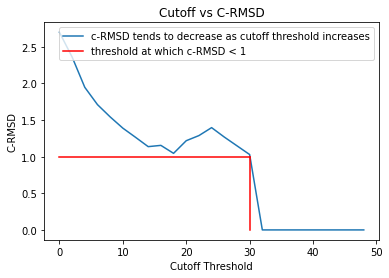

In [261]:
import matplotlib.pyplot as plt

def apply_cutoff(B,cutoff):
  n_rows,n_cols = B.shape
  B_cut = B.copy()
  for row in range(n_rows):
    new_row = []
    for col in range(n_cols):    
      if row > col:
        if B[row,col] > cutoff:
          B_cut[row,col] = B_cut[col,row] = cutoff

  return B_cut

rmsds = []
cutoffs = []
max_cutoff = 50
min_th = -1
for _ in range (int(max_cutoff/2)):
  if len(cutoffs) == 0:
    cutoffs.append(0)
  else:
    cutoffs.append(cutoffs[-1] + 2)
  cutoff = cutoffs[-1]
  B_cut = apply_cutoff(B,cutoff)
  G = GramMatrix(B_cut)
  P = getCoordsFromG(G)
  rmsd = GetImproved_cRMSD(P,A)
  rmsds.append(rmsd)

  if rmsd < 1  and min_th < 0: 
    print('Min threshold for c-RMSD < 1 = %.2f'%cutoffs[-2])
    min_th = cutoffs[-2]
  elif rmsd > 1:
    min_th = -1    
  
plt.figure(1)
plt.title('Cutoff vs C-RMSD')
plt.xlabel('Cutoff Threshold')
plt.ylabel('C-RMSD')
plt.plot(cutoffs,rmsds,label='c-RMSD tends to decrease as cutoff threshold increases')
plt.plot([min_th]*11,np.arange(0,1.1,0.1).tolist(),'r',label='threshold at which c-RMSD < 1')
plt.plot(np.arange(0,min_th+1,1).tolist(),[1]*(min_th+1),'r')
plt.legend()
plt.show()